In [1]:
from matplotlib import pyplot as plt
import scipy as scp
import numpy as np

## Planck function and constants
### not sure about 5nm step, but does it really matter? :)

In [31]:
h = 6.62607 * 10**-34
k = 1.38065 * 10**-23
c = 299792458
T = np.array([4000, 5777, 8000])
λ = np.linspace(20,4000,3981)*10**-9
I = np.array((T.shape[0],λ.shape[0]),dtype=np.float64)

def planck(t, l):
    return 2*h*c**2/ (l**5 * (np.exp(h*c/(l * k * t))-1))

In [32]:
def iterer(*args):
    return itertools.product(*[x_ if isinstance(x_,collections.Iterable) else range(x_) for x_ in args])

## Planck function for three stars

In [33]:
P= [planck(t, λ) for t in T]

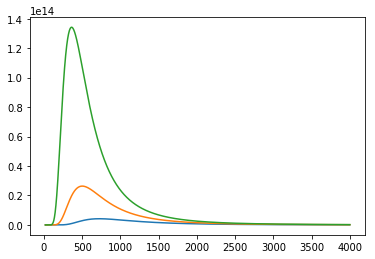

In [74]:
for p, t  in zip(P,T):
    plt.plot(λ*10**9,p)

According to some law of thermodynamics, at any $\lambda$ star with higher $T$ emits more than the star with lower $T$.
Also, we see much narrow peak for star with higher $T$

## Wien law works... 

In [42]:
l_num = np.array([λ[np.argmax(p)] for p in P])

In [43]:
b = 2.898 * 10**-3
l_wien = b * T.astype(np.float64)**(-1)

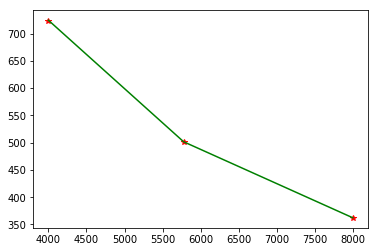

In [86]:
plt.plot(T,l_num*10**(9),'r*')
plt.plot(T,l_wien*10**(9), 'g')

350 - 700 nm - that's inside visible spectrum.

In [45]:
l_num-l_wien

array([-5.00000000e-10,  3.55547862e-10, -2.50000000e-10])

## Stephen-Boltzman law was spoilered to many at physics course, unfortunately. So I just have shown that's interested dependency can be fitted with $A T^{-4}$

In [50]:
total = np.sum(np.array(P),axis=1)

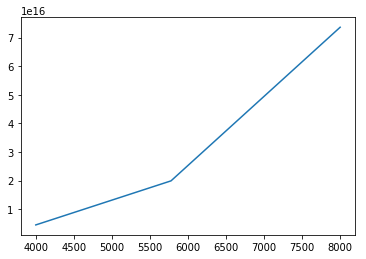

In [52]:
plt.plot(T, total)

In [87]:
T2 = np.linspace(1000, 8000, 100)
total2 = [np.sum(planck(t, λ))*(λ[1] - λ[0]) for t in T2];

/home/mikhail/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


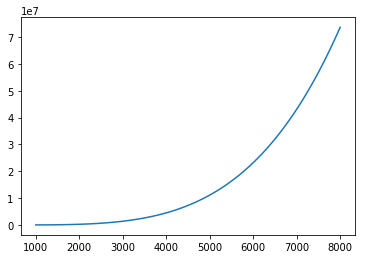

In [88]:
plt.plot(T2,total2);

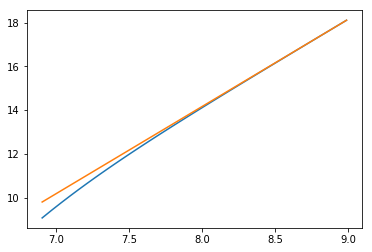

In [89]:
logT2 = np.log(T2)
logtotal2 = np.log(total2)
plt.plot(np.log(T2), np.log(total2))
plt.plot(logT2, (logT2-logT2[-1])*4 + logtotal2[-1]);

## About solar luminosity

In [65]:
sun_area = 4 * np.pi * 707000000**2

In [79]:
sunI = np.sum(planck(6000, λ))*(λ[1] - λ[0])
sunI*sun_area*np.pi

4.575537968309001e+26

## And percentage of visible light

In [90]:
λ_opt = np.linspace(380, 740, 1001)*10**(-9)
np.sum(planck(6000, λ_opt))*(λ_opt[1] - λ_opt[0])/sunI*100

44.3214679058446